<a href="https://colab.research.google.com/github/waveology/kitchen/blob/main/introduccion_cartopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a Cartopy


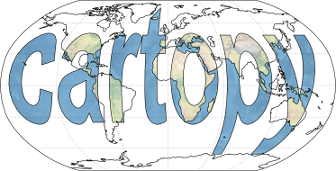

* [Web del proyecto](https://scitools.org.uk/cartopy/docs/latest/)
* [Referencia de la API](https://scitools.org.uk/cartopy/docs/latest/reference/index.html)
* [Galería](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html)

* **¿Qué es Cartopy?** Una extensión de Python para dibujar mapas y datos sobre ellos.

* **¿Cómo se usa Cartopy?** Partiendo de una proyección cartográfica añadimos elementos geográficos y superponemos los datos.

* **¿Cuándo usar Cartopy?** Cuando se requiera la presentación de datos en un contexto geográfico

* **¿Por qué Cartopy?** Porque es fácil de usar en relación con otras alternativas





## Instalación
---

In [1]:
# Esta línea parece ser necesaria en Colab
# ----------------------------------------------
!pip -q install --no-binary shapely shapely --force

# Instalación de Cartopy
# ------------------------
!pip -q install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 49.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.6 MB/s eta 0:00:00


##Descarga de datos
---

Descargamos ficheros de datos del reanálisis ERA/ECMWF para experimentar

In [2]:
ifile = 'era5_t2m_w10_2020_europa_025.rar'
!wget -q --no-check-certificate https://owncloud.aemet.es/index.php/s/7tJ8c3UpRK9sqVE/download -O {ifile} && unrar -o+ e {ifile} && rm -f {ifile}
!mv era5_t2m_w10_2020_europa_025.nc era5_2000.nc


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from era5_t2m_w10_2020_europa_025.rar

Extracting  era5_t2m_w10_2020_europa_025.nc                               10% 20% 31% 41% 52% 62% 73% 83% 94% 99%  OK 
All OK


##Importa extensiones Python

In [3]:
# Extensión principal
# -------------------------------------------
import cartopy.crs as ccrs

# Extensión gráfica genérica de Python
# ---------------------------------------
import matplotlib.pyplot as plt

##Gráficos de mapas y proyecciones cartográfcas

Hay más de una forma de componer un mapa en Cartopy. La que se presenta aquí resulta muy versátil y facilita la posibilidad de escalar la complejidad del gráfico.

* Empezamos por crear una figura contenedora a la que asignamos las dimensiones del gráfico

* Añadimos uno o más gráficos a la figura

* Para cada gráfico de la figura elegimos la proyección cartográfica de entre las de [esta lista](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections).

###Ejemplo: un mapa simple

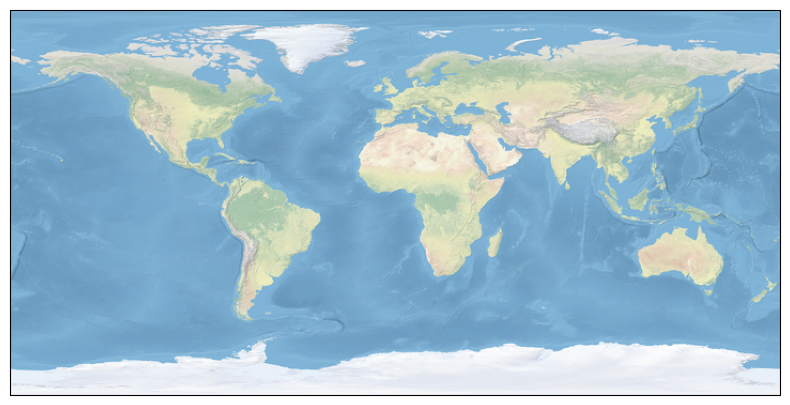

In [4]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un gráfico a la figura
# Los índices corresponden respectivamente a la fila, la columna y la posición del gráfico
# La proyección cartográfica elegida en este caso es la cilíndrica equidistante ('Plate Carrée')
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

# Añadimos un fondo genérico con océanos y continentes
# -----------------------------------------------------
ax.stock_img()

plt.show()

###Ejemplo: múltiples mapas en el mismo gráfico

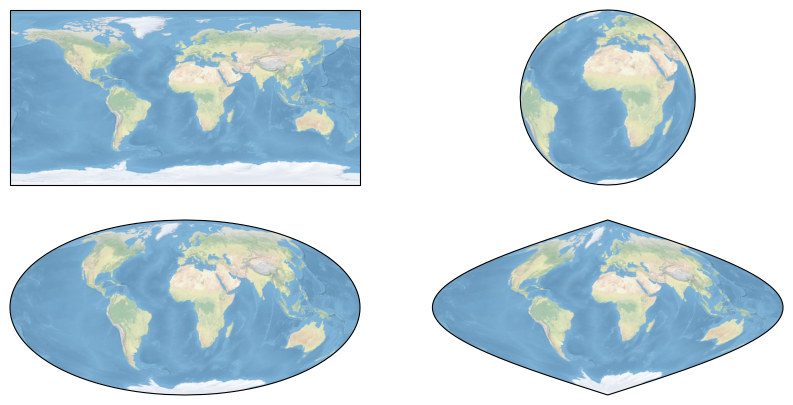

In [49]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un gráfico a la figura
# Los índices corresponden respectivamente a la fila, la columna y la posición del gráfico
# Elegimos diferentes proyecciones en cada uno
# -----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(2,2,1,projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(2,2,2,projection=ccrs.Orthographic())
ax3 = fig.add_subplot(2,2,3,projection=ccrs.Mollweide())
ax4 = fig.add_subplot(2,2,4,projection=ccrs.Sinusoidal())

for ax in (ax1,ax2,ax3,ax4) :
   # Se asegura de que el mapa llega a los límites de la proyección
   # ---------------------------------------------------------------
   ax.set_global()

   # Añadimos el fondo genérico con océanos y continentes
   # -----------------------------------------------------
   ax.stock_img()


plt.show()

##Paralelos y meridianos

Las líneas geográficas se añaden con la función ***gridlines***, que admite múltiples argumentos para refinar el resultado.

###Ejemplo: líneas geográficas en diferentes proyecciones

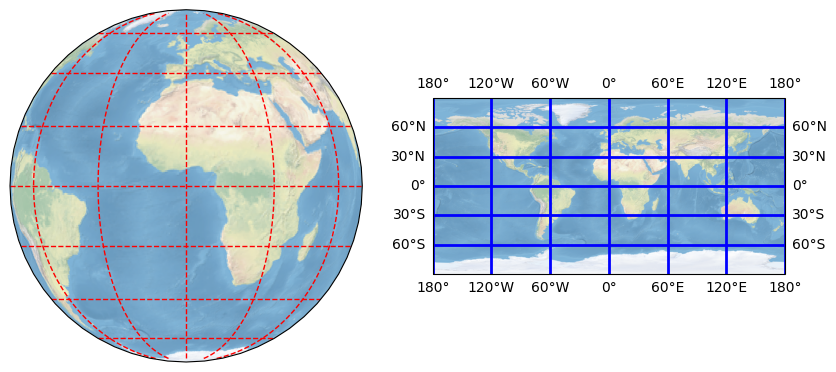

In [50]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un gráfico a la figura
# ----------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(1,2,1,projection=ccrs.Orthographic())
ax2 = fig.add_subplot(1,2,2,projection=ccrs.PlateCarree())

# Añadimos paralelos y meridianos
# ----------------------------------
ax1.gridlines(draw_labels=False,   # etiquetas
             color='red',          # color
             ls='--',              # estilo
             lw=1                  # grosor
             )

ax2.gridlines(draw_labels=True,    # etiquetas
             dms=True,             # grados,minutos y segundos
             x_inline=False,       # etiquetas dentro/fuera del gráfico
             y_inline=False,       #
             color='blue',         # color
             ls='-',               # estilo
             lw=2                  # grosor
             )

for ax in (ax1,ax2) :
   # Se asegura de que el mapa llega a los límites de la proyección
   # ---------------------------------------------------------------
   ax.set_global()

   # Añadimos el fondo genérico con océanos y continentes
   # -----------------------------------------------------
   ax.stock_img()


plt.show()

###Ejemplo: especificación detallada de líneas geográficas

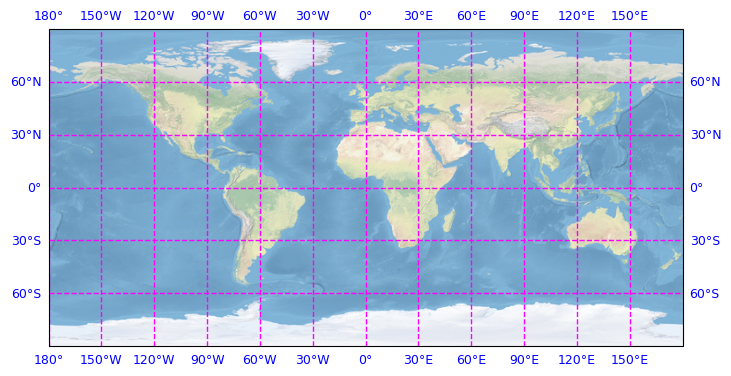

In [48]:
# Posicionamiento de etiquetas
# -------------------------------
import matplotlib.ticker as mticker

# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[18, 5])

# Añadimos un gráfico a la figura
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,2,1,projection=ccrs.PlateCarree())

# Nos aseguramos de que el mapa llega hasta el límite de la proyección
# --------------------------------------------------------------------
ax.set_global()

# Añadimos paralelos y meridianos
# ----------------------------------
gl = ax.gridlines(draw_labels=True,
             color='#ff00ff',
             ls='--',
             lw=1.0
             )

# Dónde colocar las etiquetas
# ---------------------------
gl.xlocator = mticker.FixedLocator(range(-180,180,30))
gl.ylocator = mticker.FixedLocator(range(-90,90,30))

# Qué lados tienen etiquetas
# ------------------------------
gl.top_labels=True
gl.right_labels=True
gl.bottom_labels=True
gl.left_labels=True

# Tamaño de las etiquetas
# -------------------------
gl.xlabel_style = {'size': 9, 'color': 'blue'}
gl.ylabel_style = {'size': 9, 'color': 'blue'}


# Añadimos un fondo genérico con océanos y continentes
# -----------------------------------------------------
ax.stock_img()


plt.show()

## Océanos y continentes

Para añadir océanos, continentes, líneas de costa, ríos, fronteras y otros elementos es preciso importar cartopy.feature



###Ejemplo: configuración de océanos, continentes y líneas de costa

In [ ]:
# Permite representar océanos, continentes, líneas de costa, ríos, fronteras, etc
# --------------------------------------------------------------------------------
import cartopy.feature as cfeature


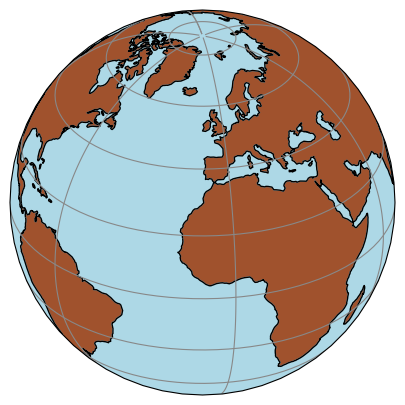

In [66]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-10, central_latitude=30))

# ======================== GLOBAL =============================
ax.set_global()
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
ax.gridlines(color='#888888')
# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
ax.coastlines(color='black', lw=1)
# =============================================================

plt.show()

##Zoom en un área

###Ejemplo: definir detalles en un área

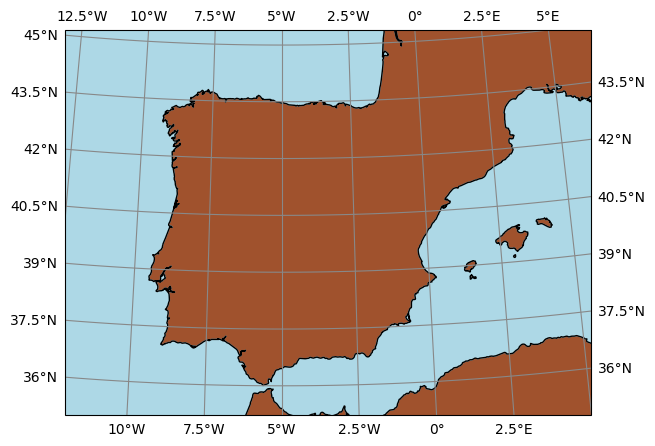

In [74]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-5, central_latitude=40))

# ======================== ÁREA =============================
ax.set_extent((-12,5,35,45))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)

# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
#ax.coastlines(color='black', lw=1)
# La resolución espacial puede ser de 110 m,  50 m o 110 m
ax.coastlines(resolution='10m', color='black', lw=1)
# =============================================================

plt.show()

###Ejemplo: añadir lagos y ríos

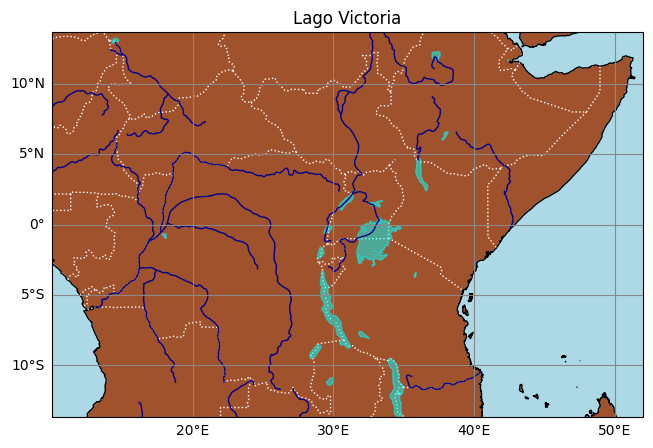

In [91]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

# ======================== ÁREA =============================
ax.set_extent((10,52,-13,13))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False
# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
#ax.coastlines(color='black', lw=1)
# La resolución espacial puede ser de 110 m,  50 m o 110 m
ax.coastlines(resolution='10m', color='black', lw=1)
# =============================================================

# =================== LAGOS ===================================
ax.add_feature(cfeature.LAKES, alpha=0.5, color='cyan')
# =============================================================

# ============================ RÍOS ===========================
ax.add_feature(cfeature.RIVERS, color='darkblue')
# =============================================================

ax.set_title('Lago Victoria')

plt.show()

##Límites administrativos

###Ejemplo: fronteras y provincias

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


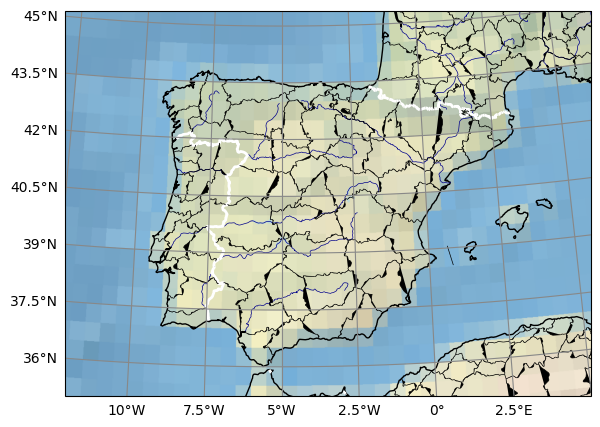

In [135]:
# Definimos la figura que actúa como contenedor y le asignamos las dimensiones
# -----------------------------------------------------------------------------
fig = plt.figure(figsize=[10, 5])

# Añadimos un mapa con proyección ortográfica
# ----------------------------------------------------------------------------------------------
ax = fig.add_subplot(1,1,1,projection=ccrs.Orthographic(central_longitude=-5, central_latitude=40))

# ======================== ÁREA =============================
#ax.set_extent((-12,15,35,55))
ax.set_extent((-12,5,35,45))
# =============================================================

# ================== PARALELOS Y MERIDIANOS ===================
gl = ax.gridlines(color='#888888', draw_labels=True)
gl.top_labels=False
gl.right_labels=False
# =============================================================

# ================== CONTINENTES ==============================
ax.add_feature(cfeature.LAND, color='sienna')
# =============================================================

# ================== OCÉANOS ==================================
ax.add_feature(cfeature.OCEAN, color='lightblue')
# =============================================================

# ================== LINEA DE COSTA ===========================
#ax.coastlines(color='black', lw=1)
# La resolución espacial puede ser de 110 m,  50 m o 110 m
ax.coastlines(resolution='10m', color='black', lw=1)
# =============================================================

# =================== LAGOS ===================================
ax.add_feature(cfeature.LAKES, alpha=0.5, color='lightblue')
# =============================================================

# ============================ RÍOS ===========================
ax.add_feature(cfeature.RIVERS, color='darkblue', lw=0.5)
# =============================================================

# ================== FRONTERAS NACIONALES =====================
ax.add_feature(cfeature.BORDERS, color='white', lw=2)
# =============================================================


# ================== DIVISIONES INTERNAS =====================
# Crear un 'feature' con las provincias
# https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-1-states-provinces/
# ---------------------------------------------------------------------------------------------
provincias = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='10m')

ax.add_feature(provincias,color='black', lw=0.5)
# =============================================================


plt.show()